In [73]:
import numpy as np
import pandas as pd

In [2]:
df_penguins = pd.read_csv("penguins.csv")
df_penguins.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Part I - Exploring our dataset

We want to explore this dataset a bit further, but to do that we first want to clean it up a bit!
Can you:

1. `rename` the columns to shorter names
2. remove all of the rows with `NaN` values

In [3]:
df_penguins = df_penguins.rename(columns={'bill_length_mm': 'bill_l', 'bill_depth_mm': 'bill_d', 'flipper_length_mm': 'flipper_l', 'body_mass_g': 'mass'}).dropna()

After cleaning it, we want to get a general sense of the values in this dataset.
Can you get `list`s of all the unique `species`, `island`s, and `sex`es in this dataset?

In [21]:
species = df_penguins['species'].unique()
islands = df_penguins['island'].unique()
sexes = df_penguins['sex'].unique()

species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Let's dive in a bit deeper. The Adelie and Gentoo species on the Biscoe island might have different in weight from the Adelie and Chinstrap on the Dream island. 
Can you calculate the average weight of both species on these two islands?

In [30]:
# We can do this in multiple ways, all shown below. These are all equivalent, so it is up to your preference what you use.
# At the end of the next exercise we show a different, much quicker way of obtaining the final answers

adelie_biscoe = df_penguins.query("species == 'Adelie' & island == 'Biscoe'")['mass'].mean()
adelie_dream = df_penguins[(df_penguins.species=='Adelie') & (df_penguins.island=='Dream')]['mass'].mean()

gentoo_biscoe = df_penguins.loc[(df_penguins.species=='Gentoo') & (df_penguins.island=='Biscoe')]['mass'].mean()
chinstrap_dream = df_penguins.query("species == 'Chinstrap' & island == 'Dream'").mean(numeric_only=True)['mass']

print(f"Adelie Biscoe: {adelie_biscoe}")
print(f"Adelie Dream: {adelie_dream}")
print(f"Gentoo Biscoe: {gentoo_biscoe}")
print(f"Chinstrap Dream: {chinstrap_dream}")

Adelie Biscoe: 3709.659090909091
Adelie Dream: 3701.3636363636365
Gentoo Biscoe: 5092.436974789916
Chinstrap Dream: 3733.0882352941176


# Part II - Tidy data

In [36]:
df_flights = pd.read_csv('flights.csv')
df_flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


The `flights` data is very long at the moment? 
Can you make it wide again, so every month has its own column?

In [37]:
df_flights_wide = df_flights.pivot(index='year', columns='month', values='passengers')
df_flights_wide

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


Often when working with datasets, a long format is clearer to use than a wide format.

As an exercise, for both formats, can you calculate the average # of passengers per month for every year?
Which approach do you find more readable and understandable?

In [38]:
df_flights.groupby('month')[['passengers']].mean()

,passengers
month,
Apr,267.083333
Aug,351.083333
Dec,261.833333
Feb,235.000000
Jan,241.750000
Jul,351.333333
Jun,311.666667
Mar,270.166667
May,271.833333


In [34]:
df_flights_wide.mean(axis=1)

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
dtype: float64

Can you redo the last exercise of part I, but now using `groupby` to obtain the average weight of all species on all island separately?

In [40]:
penguin_mass = df_penguins.groupby(['species', 'island'])[['mass']].mean()
penguin_mass

mass
species   island                
Adelie    Biscoe     3709.659091
          Dream      3701.363636
          Torgersen  3708.510638
Chinstrap Dream      3733.088235
Gentoo    Biscoe     5092.436975

# Part III - Visualization

In [41]:
import matplotlib.pyplot as plt

We want to investigate the distribution of mass and flipper length in penguins.
For every penguin, can you plot the mass vs flipper length, colored by penguin species?

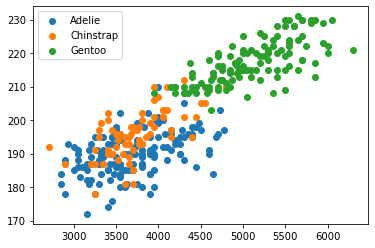

In [43]:
fig, ax = plt.subplots()

for name, group in df_penguins.groupby('species'):
    ax.scatter(group['mass'], group['flipper_l'], label=name)

plt.legend()
plt.show()

More information is needed. Create a single figure with two plots next to each other.
In the first plot, show mass vs flipper length colored by penguin species.
In the second plot, show the number of male vs female penguins per island, using a bar chart.
Experiment with adding labels, ticks, etc... to make the figure as appealing as possible!

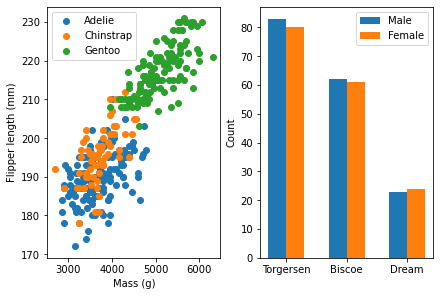

In [86]:
#layout='constrained' makes sure that the figure fits in the boundaries when saving
fig, axes = plt.subplots(nrows=1, ncols=2, layout='constrained') 

for name, group in df_penguins.groupby('species'):
    axes[0].scatter(group['mass'], group['flipper_l'], label=name)
axes[0].set_xlabel("Mass (g)")
axes[0].set_ylabel('Flipper length (mm)')
axes[0].legend()

# Plotting the penguin counts takes a bit more effort.
penguin_counts = df_penguins.groupby(['island', 'sex']).size() # First we calculate the sizes of every group (the # of penguins)
x = np.arange(len(islands)) # Then we need to manually set the location of the bars  on the x-axis (every island corresponds to a number from 0 to 2)
width = 0.3 # width of the bars
# Plot bars for the males and females individually. Note the selector, we select every island (:) and than the sex individually.
# We can do this because groupby multiple levels (island and sex) creates a so-called MultiIndex. This is a useful when you need to select specific subgroups.
axes[1].bar(x - width/2, penguin_counts.loc[:, 'Male'], width=width, label='Male') 
axes[1].bar(x + width/2, penguin_counts.loc[:, 'Female'], width=width, label='Female')
# Some styling to make the figure look a bit nicer
axes[1].set_xticks(x)
axes[1].set_xticklabels(islands)
axes[1].set_ylabel('Count')

plt.legend()
plt.show()

Seaborn is a great package to make visualizations. Can you reproduce the above plot using seaborn?
A hint is given to get you started adding seaborn to matplotlib figures.

In [83]:
# If seaborn isn't installed yet, this will install it for you.

try:
    import seaborn as sns
except ImportError:
    %pip install seaborn

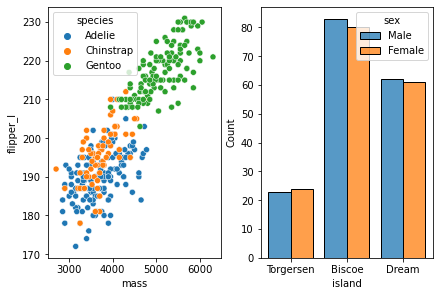

In [92]:
fig, axes = plt.subplots(1,2, constrained_layout=True)

# We can plot Seaborn plots directly on Matplotlib axes. Useful for composing multiple figures!
# Also note how expressive the plotting is. We can be very explicit about which relations we want to plot, 
# without struggling between matching the data analysis with the specific formats required by Matplotlib
sns.scatterplot(ax=axes[0], data=df_penguins, x='mass', y='flipper_l', hue='species')
sns.histplot(ax=axes[1], data=df_penguins, x='island', hue='sex', multiple='dodge', shrink=0.8)

plt.show()

Hmm, I don't like these colours.Can you recreate the previous plot, but try out a couple of different color palettes?
Hint: `sns.set_palette` works globally, so it affects all of your plots.
Look at the docs of `sns.color_palette` to see how you can temporarily change the palette instead. 

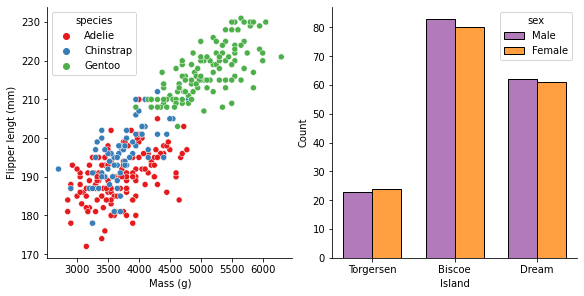

In [106]:
# We temporarily set the color palette using a `with` statement.
with sns.color_palette("Set1"):

    fig, axes = plt.subplots(1,2, figsize=(8,4), constrained_layout=True) # Slightly adjust the figure size (in inches)

    sns.scatterplot(ax=axes[0], data=df_penguins, x='mass', y='flipper_l', hue='species')
    sns.histplot(ax=axes[1], data=df_penguins, 
                x='island', hue='sex', 
                multiple='dodge', shrink=0.7,
                palette=['C3', 'C4'] # We set the color palette for the histogram explicitly, to further distuingish the colors from the scatter plot
                # C3, C4, Ci, etc... always refer to the 3rd, 4th, ith color in the active color palette
    )

    # We manually set some of the axis-labels to finalize the figure
    axes[0].set_xlabel('Mass (g)')
    axes[0].set_ylabel('Flipper lengt (mm)')
    axes[1].set_xlabel('Island')

    sns.despine() # This function automatically removes some of the black lines around the plots

    plt.show()